# Supermarket Sales Data

Link: https://www.kaggle.com/datasets/yapwh1208/supermarket-sales-data?select=annex4.csv

This is a dataset of sales data of vegetables in a supermarket.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
df1 = pd.read_csv('data/annex1.csv')
df2 = pd.read_csv('data/annex2.csv')
df3 = pd.read_csv('data/annex3.csv')
df4 = pd.read_csv('data/annex4.csv')

In [3]:
display(df1.shape)
display(df1.head(3))

display(df2.shape)
display(df2.head(3))

display(df3.shape)
display(df3.head(3))

display(df4.shape)
df4.drop(columns=['Item Name'], inplace=True)
display(df4.head(3))

(251, 4)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


(878503, 7)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


(55982, 3)

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19


(251, 3)

,Item Code,Loss Rate (%)
0,102900005115168,4.39
1,102900005115199,10.46
2,102900005115250,10.80


In [4]:
df_raw = pd.merge(df2, df1, how='left', on='Item Code')
df_raw = pd.merge(df_raw, df3, how='left', on=['Item Code', 'Date'])
df_raw = pd.merge(df_raw, df4, how='left', on='Item Code')

In [20]:
display(df_raw.shape)
df_raw.head()

(878503, 13)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),Hour
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08,9
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27,9
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08,9
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43,9
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70,9


In [6]:
df_raw.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [26]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw = df_raw.astype({
    'Item Code': 'str',
    'Category Code': 'str',
})

In [27]:
df_raw.dtypes

Date                           datetime64[ns]
Time                                   object
Item Code                              object
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
Item Name                              object
Category Code                          object
Category Name                          object
Wholesale Price (RMB/kg)              float64
Loss Rate (%)                         float64
Hour                                    int32
dtype: object

---

### Exploratory Data Analysis

**Item Name**

In [28]:
df_raw[['Item Name', 'Item Code']].value_counts().reset_index()

,Item Name,Item Code,count
0,Wuhu Green Pepper (1),102900011016701,69945
1,Broccoli,102900005116714,58905
2,Xixia Mushroom (1),102900005116530,47509
3,Yunnan Shengcai,102900005115779,39887
4,Net Lotus Root (1),102900005116899,39285
...,...,...,...
241,Needle Mushroom (Bag),102900011031858,1
242,Fruit Pepper (Orange),102900011009772,1
243,Chinese Caterpillar Fungus Flowers (Box) (2),106973223300667,1
244,White Jelly Mushroom,102900011023075,1


**Orders**

In [29]:
df_order = df_raw.groupby(['Date'], as_index=False, observed=True)['Quantity Sold (kilo)'].agg({'sum', 'count'})
df_order.head(5)

,Date,count,sum
0,2020-07-01,1002,404.346
1,2020-07-02,974,393.678
2,2020-07-03,965,385.018
3,2020-07-04,1231,483.299
4,2020-07-05,1296,516.917


In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_order['Date'].values,
    y=df_order['count'].values,
    mode='lines+markers',
    name='Valores reais',
))

fig.update_layout(
    title=f'<span>Vendas no período (quantidade)</span>', 
    autosize=False,
    width=2200,
    height=400,
    xaxis=dict(title=f'<span>Período</span>'),
    yaxis=dict(title=f'<span>Quantidade de vendas</span>')
)

fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_order['Date'].values,
    y=df_order['sum'].values,
    mode='lines+markers',
    name='Valores reais',
))

fig.update_layout(
    title=f'<span>Vendas no período (total por peso)</span>', 
    autosize=False,
    width=2200,
    height=400,
    xaxis=dict(title=f'<span>Período</span>'),
    yaxis=dict(title=f'<span>Total em peso de vendas</span>')
)

fig.show()

**Analisando um item qualquer**

In [33]:
df_order = df_raw.groupby(['Date', 'Item Code'], as_index=False, observed=True)['Quantity Sold (kilo)'].agg({'sum', 'count'})
df_order = df_order.loc[df_order['Item Code'] == '102900005116714']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_order['Date'].values,
    y=df_order['sum'].values,
    mode='lines+markers',
    name='Valores reais',
))

fig.update_layout(
    title=f'<span>Vendas no período (total por peso) do item Broccolli</span>', 
    autosize=False,
    width=2200,
    height=400,
    xaxis=dict(title=f'<span>Período</span>'),
    yaxis=dict(title=f'<span>Total em peso de vendas</span>')
)

fig.show()

**Venda por período do dia**

In [17]:
df_raw['Hour'] = df_raw['Time'].apply(lambda row: row.split(':')[0]).astype(int)

df_hours = df_raw['Hour'].value_counts().reset_index().sort_values(by=['Hour'])


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_hours['Hour'].values,
    y=df_hours['count'].values,
    mode='lines+markers',
    name='Quantidade por hora',
))

fig.update_layout(
    title=f'<span>Quantidade de vendas por hora</span>', 
    autosize=False,
    width=1000,
    height=600,
    xaxis=dict(title=f'<span>Horas</span>'),
    yaxis=dict(title=f'<span>Quantidade vendida</span>')
)

fig.show()

**Correlação**

In [55]:
df_corr = df_raw.copy()

In [56]:
df_corr['Sale or Return'].value_counts()

map_sale_return = {
    'sale': 1,
    'return': 0
}

map_discount = {
    'Yes': 1,
    'No': 0
}


df_corr['Sale or Return'] = df_corr['Sale or Return'].map(map_sale_return)
df_corr['Discount (Yes/No)'] = df_corr['Discount (Yes/No)'].map(map_discount)

<Axes: >

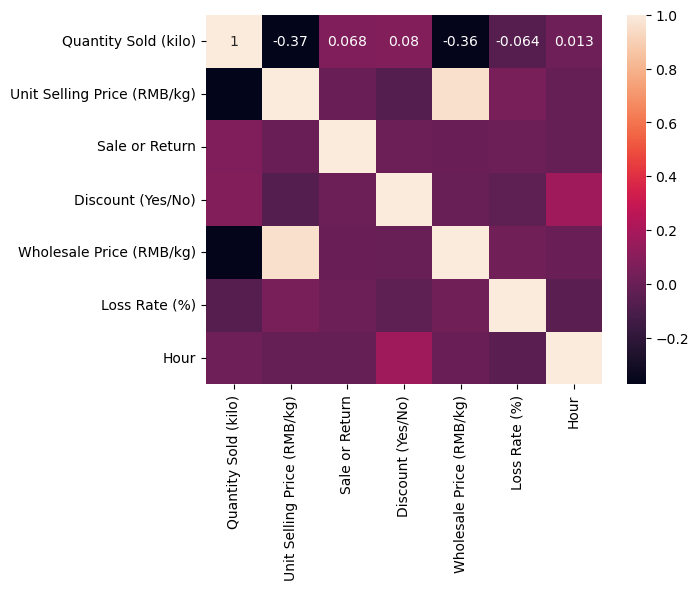

In [57]:
df_corr = df_corr[[
    'Quantity Sold (kilo)',
    'Unit Selling Price (RMB/kg)',
    'Sale or Return',
    'Discount (Yes/No)',
    'Wholesale Price (RMB/kg)',
    'Loss Rate (%)',
    'Hour'
]].corr()

sns.heatmap(df_corr, annot=True)

In [43]:
df_corr = df_corr.corr()



ValueError: could not convert string to float: '09:15:07.924'